In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [17]:
# Need to change to the cleaned datasets later
train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')

In [18]:
X = train_data[['Sex','Pclass']].copy()
y = train_data['Survived']
#X.shape

In [ ]:
#Map male/female to 0/1 , this line of code is not needed when we used cleaned datasets.
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})

print(X.head())


   Sex  Pclass
0    0       3
1    1       1
2    1       3
3    1       1
4    0       3


In [37]:
# X_sex is data with Sex as only feature
X_sex = X[['Sex']].copy()
X_pclass = X[['Pclass']].copy()
type(X_sex)

pandas.DataFrame

In [ ]:
# test_train split is tested on 0.1,0.2,0.3, and 0.1 gives the highest test accuracy 
# no matter if we choose only Sex or Pclass
# choosing Pclass alone, gives low accuracy
accuracy = []
for i in range(2):
    data = X.iloc[:,[i]]
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.1, random_state=42)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] 
    accuracy.append(accuracy_score(y_test, y_pred)) 
    #print("Accuracy:", accuracy_score(y_test, y_pred))
    #print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8111111111111111
Confusion Matrix:
 [[45  9]
 [ 8 28]]
Accuracy: 0.7111111111111111
Confusion Matrix:
 [[45  9]
 [17 19]]


In [51]:
# use both Sex and Pclass
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1] 
accuracy.append(accuracy_score(y_test, y_pred)) 

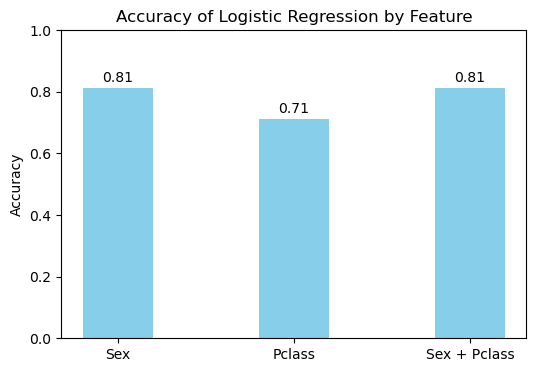

In [52]:
features = ['Sex', 'Pclass', 'Sex + Pclass']

# Plot
plt.figure(figsize=(6,4))
for i, acc in enumerate(accuracy):
    plt.bar(features[i], acc, color='skyblue',width=0.4)
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center')  

plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Accuracy of Logistic Regression by Feature')
plt.show()